# MNIST DATA SET 784 Dimensions

MNIST(Modified National Institute of Standards and Technology) is a large data set of handwritten DIGITS these are in the form of 28x28 pixels images.

<img src="images/mnist.png"/>

In this data set we 60k training data points and 10k test data points

### Objective: These handwritten digits should be recognized correctly

<img src="images/mnist2.png"/>

Here the image is converted to 28x28 matrix where the pixels are active its mentioned as 1 in the matrix and the pixels which are partly active are represented in gray color with value near to 1.

<img src="images/mnist3.png"/>

The 28x28 matrix is converted to 784x1 matrix that is row flattening i.e it is converted to column vector.<br>

In our data set there 60k training data pnts i.e for each image we convert them int 28x28 matrix then flatten it to 784x1.<br>

Then all these 784x1 col vectors are transposed to get row wectors i.e 1x784 then all the row vectors put together become's as above image i.e (60000 x 784) Matrix 'X'. 

# Loading MNIST DATA

In [1]:
#Dataset downloaded from Kaggle
# https://www.kaggle.com/c/digit-recognizer/data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#dataframe
d0 = pd.read_csv('mnist_train.csv')

d0.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# storing labels in l, label is nothing but digits from 0-9 i.e actual digit of the row vector 
l = d0['label']

In [5]:
# now considering data set with excluding label column

d = d0.drop("label",axis=1)
d.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
d.shape

(60000, 784)

Note: one row vector is nothing but one image

In [7]:
l.shape

(60000,)

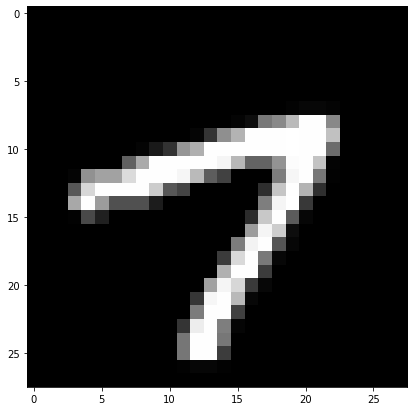

7

In [14]:
# display/plot a number

plt.figure(figsize=(7,7))

#loading image at index 100
idx=101

grid_data=d.iloc[idx].to_numpy().reshape(28,28); #converting 1d to 2d

#imshow is method to show imgs and cmap-> colormap
plt.imshow(grid_data,interpolation="none",cmap="gray");
plt.show()

l[idx]

In [15]:
# using 15k points instead of 42k points

labels = l.head(15000)
data = d.head(15000)

print(data.shape)

(15000, 784)


In [16]:
# Data Preprocessing:Column Standardizing the data i.e making mean=0 and var=1

from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
standardized_data.shape

(15000, 784)

In [17]:
# finding the covariance matrix which is A^T * A

sample_data = standardized_data

#mat mul using numpy
# it will calculate the covariance between each pair of features
covar_matrix = np.matmul(sample_data.T,sample_data)

covar_matrix.shape

(784, 784)

In [18]:
data

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## PCA By manually calculating Eigen Values and Vectors

In [19]:
# finding the top two eigen-values and correspnding Eigen vectors
# for projecting on to 2D space.

# check Vidoes on Eigen values and Eigen Vectors

from scipy.linalg import eigh

# The parameter eigvals is defined (low value to high value)
# eigh function will return the Eigen values and Eigen Vectors
# This code generates Top 2 (782,783 ) eigen values,
# Our Covariance matric size is 784x784
# here we are considering top two features 
# whose Variance are spread is more so that we are considering 
# Max imp data.

values, vectors = eigh(covar_matrix,eigvals=(782,783))

# top 2 vectors
print("Shape of eigen vectors",vectors.shape)

vectors =vectors.T

print("Transpose of eigen vectors shape",vectors.shape)



Shape of eigen vectors (784, 2)
Transpose of eigen vectors shape (2, 784)


Observation: 2 features 784 cols

In [20]:
# Projecting Original data sample on the plane
# this is plotted by considering Top 2 Eigen Vectors,
# i.e considering top 2 features

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors,sample_data.T)

print(vectors.shape," x ",sample_data.T.shape," = ",new_coordinates.shape);

(2, 784)  x  (784, 15000)  =  (2, 15000)


Observation: 2 features 15000 points

In [21]:
import pandas as pd

# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

# creating a new data frame for ploting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


C:\Users\sumanth\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


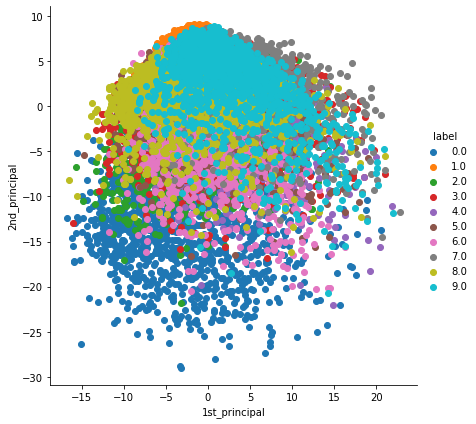

In [22]:
import seaborn as sn
sn.FacetGrid(dataframe,hue="label",size=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

## PCA Using Scikit-Learn
here no need of calculating Eigen vals,vectors manually...its all taken care by this lib

In [23]:
#initializing pca

from sklearn import decomposition
pca = decomposition.PCA()

In [24]:
pca.n_components = 2; #i.e as we are plotting 2d its given as 2

#total pca is done just by this single line of code
pca_data = pca.fit_transform(sample_data)

print("Shape of pca: ", pca_data.shape)



Shape of pca:  (15000, 2)


C:\Users\sumanth\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


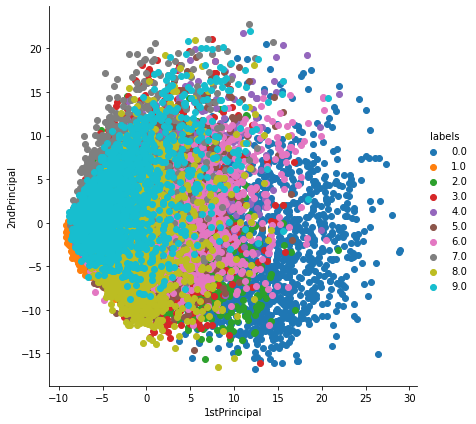

In [25]:
# attaching label for the received 2d data (pca_data)

#vstack is ntg but vertically aligning the data
pca_data = np.vstack((pca_data.T,labels)).T

#converting numpy array to df

pca_df = pd.DataFrame(data=pca_data, columns = ("1stPrincipal","2ndPrincipal","labels"))
sn.FacetGrid(pca_df,hue="labels",size=6).map(plt.scatter,"1stPrincipal","2ndPrincipal").add_legend()
plt.show()

## PCA Code Using non- Visualization

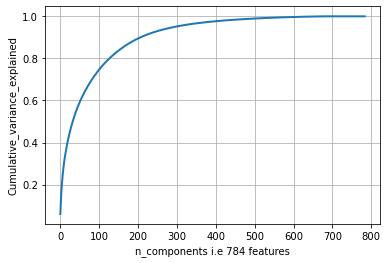

In [26]:
pca.n_components = 784

pca_data = pca.fit_transform(sample_data)

# it contains percentage of each feature among the 784 features
percentage_var_explained = pca.explained_variance_ /np.sum(pca.explained_variance_)

#cumulative sum of percentages of each feature
cum_var_explained = np.cumsum(percentage_var_explained)


plt.figure(1,figsize=(6,4))

plt.clf()

plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components i.e 784 features')
plt.ylabel('Cumulative_variance_explained')
plt.show()



Observation: Here we can see how many no.of features covers what percent of Variance.....By this we can decide how many features to consider depending on the situation/case.

# T-SNE

C:\Users\sumanth\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


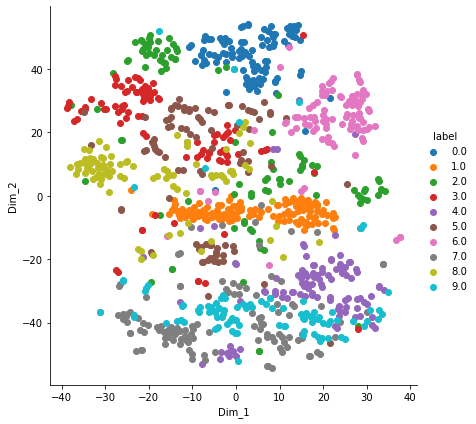

In [27]:
# TSNE

from sklearn.manifold import TSNE

# Picking the top 1000 points as TSNE takes a lot of time for 15K points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

#here random_state=0 if we mention this the result will be same 
# even when we run this algo multiple times, if not it may vary 
# for every run
model = TSNE(n_components=2, random_state=0)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### Perplexity=50 

C:\Users\sumanth\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


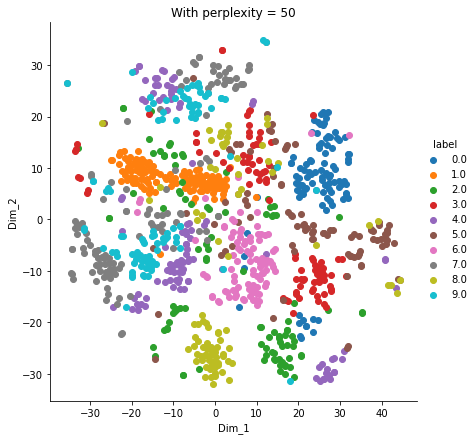

In [28]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

#### n_iter=5000

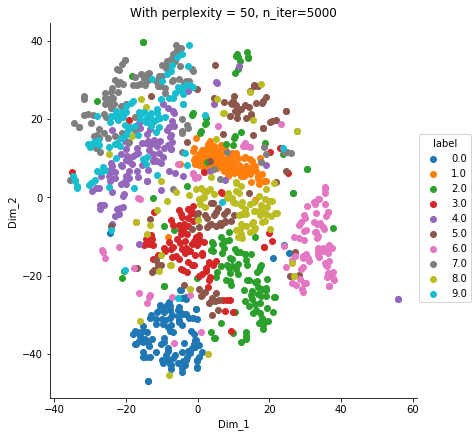

In [66]:
model = TSNE(n_components=2, random_state=0, perplexity=50,  n_iter=5000)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()

#### perplexity =2

C:\Users\sumanth\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


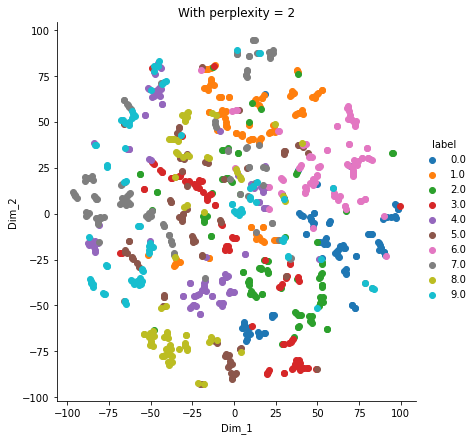

In [29]:
model = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = model.fit_transform(data_1000) 

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 2')
plt.show()

Observation:As the perplexity is very low i.e each point considers only 2 other points as neighbours, we are getting unstable results.

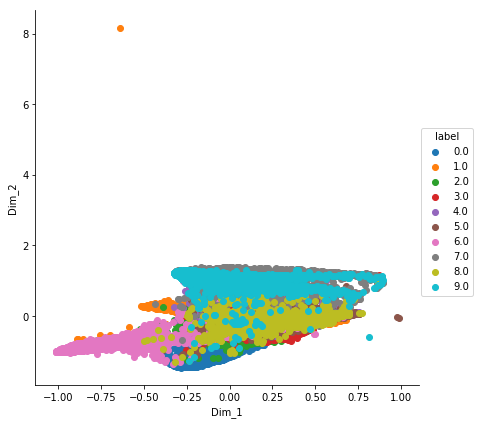

In [22]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=250)

tsne_data = model.fit_transform(standardized_data)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels)).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 20k data points and Perplexity 30

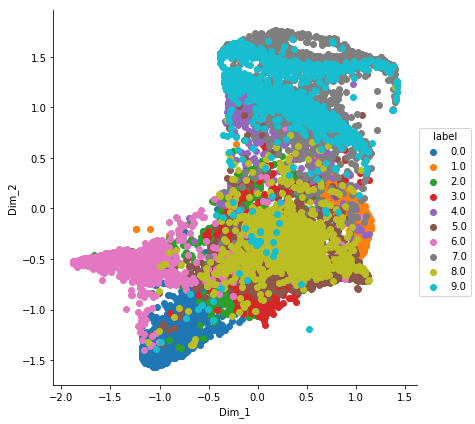

In [25]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=30,n_iter=250)

tsne_data = model.fit_transform(standardized_data[0:20000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:20000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points

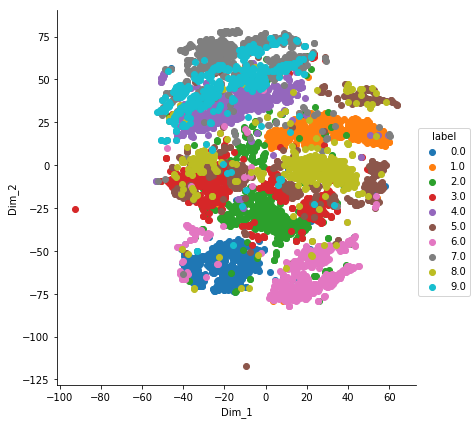

In [27]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=30,n_iter=1000)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity =15

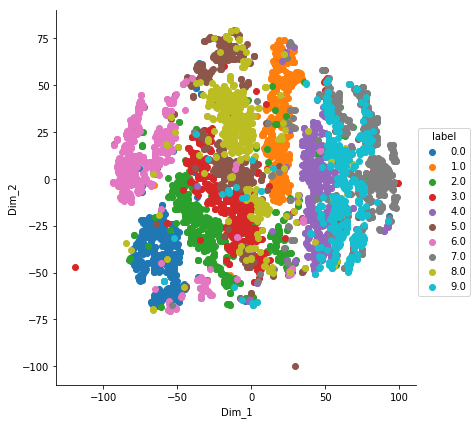

In [28]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=15,n_iter=1000)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity =20

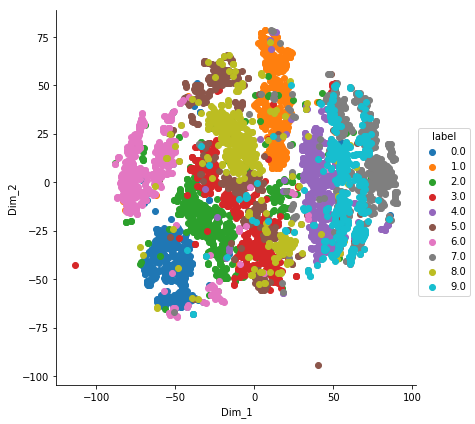

In [30]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=20,n_iter=1000)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity = 25

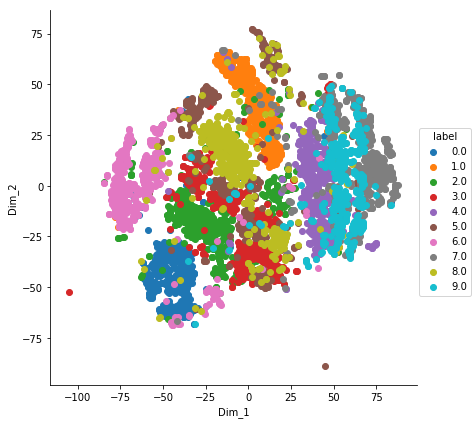

In [31]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=25,n_iter=1000)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity = 40

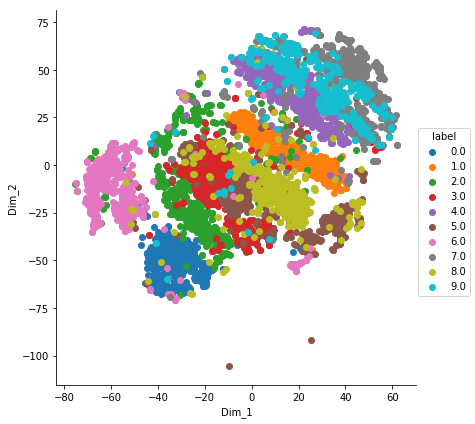

In [32]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=40,n_iter=1000)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity = 50

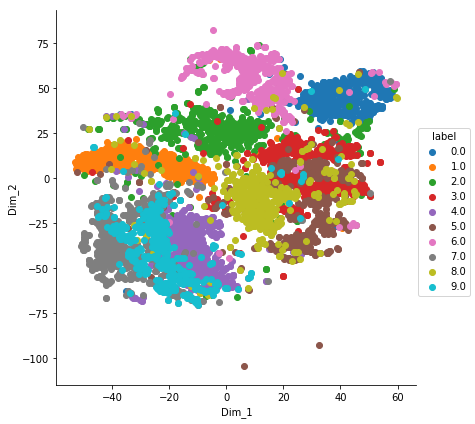

In [33]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=1000)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity = 10

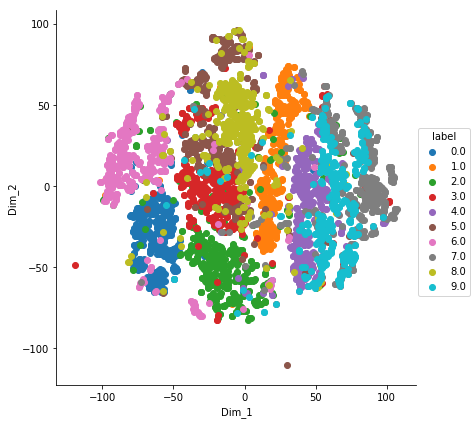

In [34]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=10,n_iter=1000)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity = 5 and 2k iterations

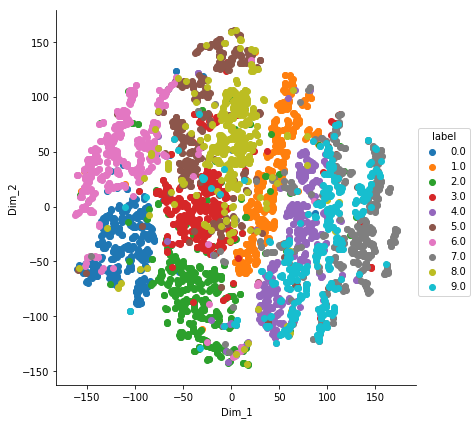

In [35]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=5,n_iter=2500)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity = 10 and 2k iterations

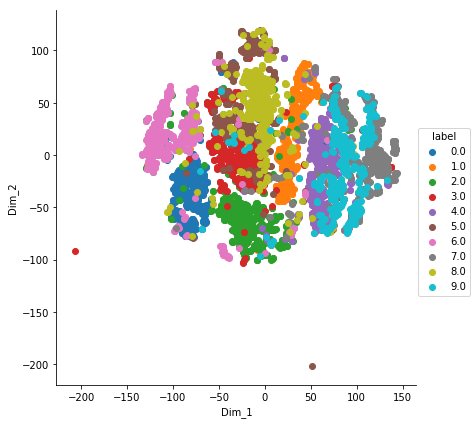

In [36]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=10,n_iter=2500)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### With 5k data points and Perplexity = 15 and 3k iterations

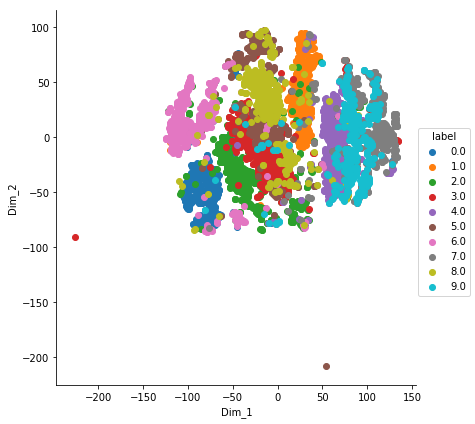

In [37]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0,perplexity=15,n_iter=3000)

tsne_data = model.fit_transform(standardized_data[0:5000])

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels[0:5000])).T
#converting np array to df and adding labels col
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()